In [5]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Apply seaborn style properly
sns.set()

%matplotlib inline


In [6]:
# Cell 2: Load Data and Define Metrics
df = pd.read_csv('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\notebooks\\cleaned_data\\insurance_claims_cleaned.csv')
# Define metrics
df['ClaimFrequency'] = (df['TotalClaims'] > 0).astype(int)  # 1 if claim occurred, 0 otherwise
df['ClaimSeverity'] = df['TotalClaims'].where(df['TotalClaims'] > 0)  # Claim amount if claim occurred
df['Margin'] = df['TotalPremium'] - df['TotalClaims']  # Margin = Premium - Claims
print("First 5 rows:")
display(df[['Province', 'PostalCode', 'Gender', 'TotalPremium', 'TotalClaims', 'ClaimFrequency', 'ClaimSeverity', 'Margin']].head())

First 5 rows:


,Province,PostalCode,Gender,TotalPremium,TotalClaims,ClaimFrequency,ClaimSeverity,Margin
0,Gauteng,1459,Not specified,21.929825,0.0,0,NaN,21.929825
1,Gauteng,1459,Not specified,21.929825,0.0,0,NaN,21.929825
2,Gauteng,1459,Not specified,0.000000,0.0,0,NaN,0.000000
3,Gauteng,1459,Not specified,512.848070,0.0,0,NaN,512.848070
4,Gauteng,1459,Not specified,0.000000,0.0,0,NaN,0.000000


H1: Risk Differences Across Provinces
ClaimFrequency (Chi-squared): chi2 = 104.19, p-value = 0.0000
ClaimSeverity (ANOVA): F = 4.83, p-value = 0.0000


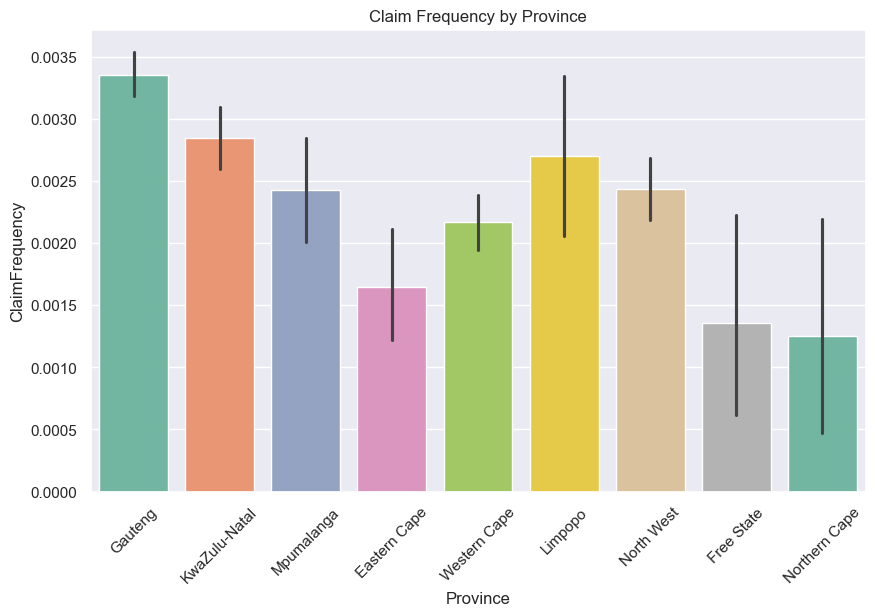

In [7]:
# Cell 3: Hypothesis 1 - Risk Differences Across Provinces
# H0: No risk differences across provinces (ClaimFrequency and ClaimSeverity)
# Chi-squared test for ClaimFrequency
province_freq = pd.crosstab(df['Province'], df['ClaimFrequency'])
chi2_freq, p_freq, _, _ = stats.chi2_contingency(province_freq)
# ANOVA for ClaimSeverity (non-null values)
severity_by_province = [df[df['Province'] == p]['ClaimSeverity'].dropna() for p in df['Province'].unique()]
anova_stat, anova_p = stats.f_oneway(*severity_by_province)
print("H1: Risk Differences Across Provinces")
print(f"ClaimFrequency (Chi-squared): chi2 = {chi2_freq:.2f}, p-value = {p_freq:.4f}")
print(f"ClaimSeverity (ANOVA): F = {anova_stat:.2f}, p-value = {anova_p:.4f}")
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='ClaimFrequency', data=df, hue='Province', palette='Set2', legend=False)
plt.title('Claim Frequency by Province')
plt.xticks(rotation=45)
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\claim_frequency_province.png')
plt.show()

H2: Risk Differences Between Zip Codes
ClaimFrequency (Chi-squared): chi2 = 60.23, p-value = 0.0000
ClaimSeverity (ANOVA): F = 3.89, p-value = 0.0039


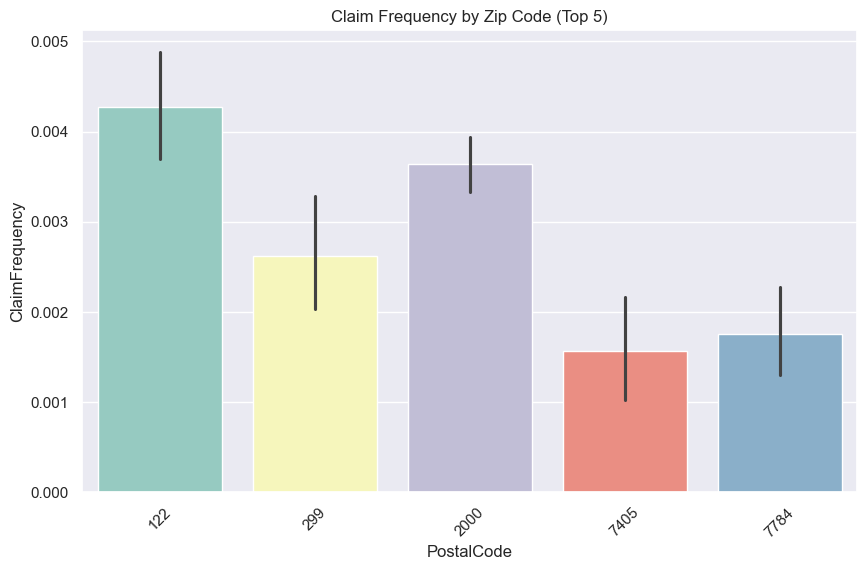

In [8]:
# Cell 4: Hypothesis 2 - Risk Differences Between Zip Codes
# H0: No risk differences between zip codes (PostalCode)
# Sample top 5 zip codes to avoid excessive groups
top_zips = df['PostalCode'].value_counts().head(5).index
df_zip = df[df['PostalCode'].isin(top_zips)]
# Chi-squared test for ClaimFrequency
zip_freq = pd.crosstab(df_zip['PostalCode'], df_zip['ClaimFrequency'])
chi2_zip_freq, p_zip_freq, _, _ = stats.chi2_contingency(zip_freq)
# ANOVA for ClaimSeverity
severity_by_zip = [df_zip[df_zip['PostalCode'] == z]['ClaimSeverity'].dropna() for z in top_zips]
anova_zip_stat, anova_zip_p = stats.f_oneway(*severity_by_zip)
print("H2: Risk Differences Between Zip Codes")
print(f"ClaimFrequency (Chi-squared): chi2 = {chi2_zip_freq:.2f}, p-value = {p_zip_freq:.4f}")
print(f"ClaimSeverity (ANOVA): F = {anova_zip_stat:.2f}, p-value = {anova_zip_p:.4f}")
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='PostalCode', y='ClaimFrequency', data=df_zip, hue='PostalCode', palette='Set3', legend=False)
plt.title('Claim Frequency by Zip Code (Top 5)')
plt.xticks(rotation=45)
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\claim_frequency_zip.png')
plt.show()

H3: Margin Differences Between Zip Codes
Margin (ANOVA): F = 2.41, p-value = 0.0469


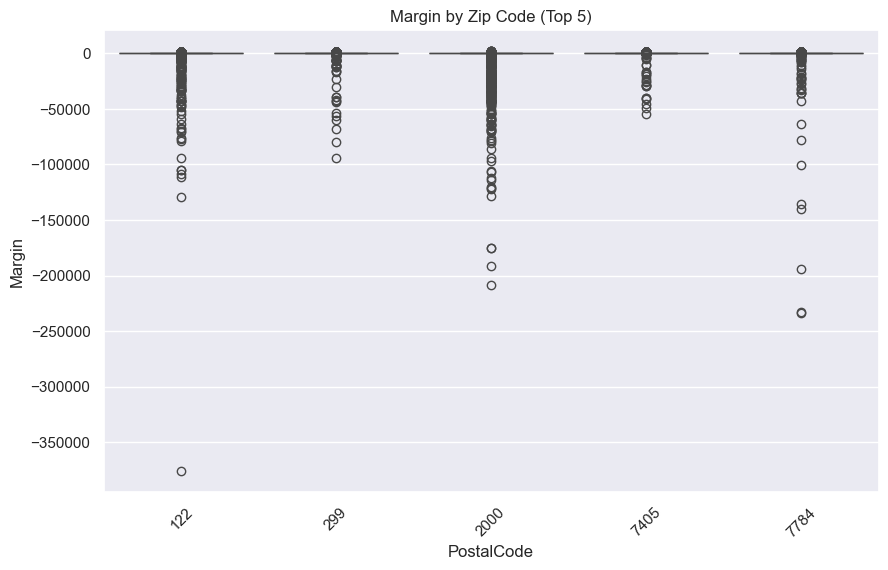

In [9]:
# Cell 5: Hypothesis 3 - Margin Differences Between Zip Codes
# H0: No significant margin difference between zip codes
# ANOVA for Margin
margin_by_zip = [df_zip[df_zip['PostalCode'] == z]['Margin'].dropna() for z in top_zips]
anova_margin_stat, anova_margin_p = stats.f_oneway(*margin_by_zip)
print("H3: Margin Differences Between Zip Codes")
print(f"Margin (ANOVA): F = {anova_margin_stat:.2f}, p-value = {anova_margin_p:.4f}")
# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='PostalCode', y='Margin', data=df_zip, hue='PostalCode', palette='Set1', legend=False)
plt.title('Margin by Zip Code (Top 5)')
plt.xticks(rotation=45)
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\\week 3\\insurance-risk-modeling\\reports\\margin_zip.png')
plt.show()

H4: Risk Differences Between Gender
ClaimFrequency (Chi-squared): chi2 = 6.99, p-value = 0.0303
ClaimSeverity (T-test): t = -0.42, p-value = 0.6760


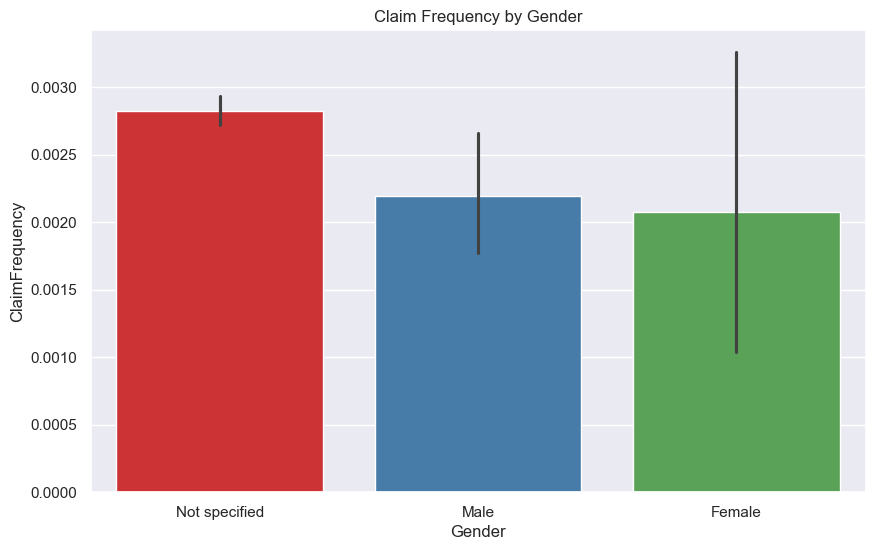

In [10]:
# Cell 6: Hypothesis 4 - Risk Differences Between Gender
# H0: No risk difference between women and men
# Chi-squared test for ClaimFrequency
gender_freq = pd.crosstab(df['Gender'], df['ClaimFrequency'])
chi2_gender_freq, p_gender_freq, _, _ = stats.chi2_contingency(gender_freq)
# T-test for ClaimSeverity
severity_male = df[df['Gender'] == 'Male']['ClaimSeverity'].dropna()
severity_female = df[df['Gender'] == 'Female']['ClaimSeverity'].dropna()
t_stat, t_p = stats.ttest_ind(severity_male, severity_female)
print("H4: Risk Differences Between Gender")
print(f"ClaimFrequency (Chi-squared): chi2 = {chi2_gender_freq:.2f}, p-value = {p_gender_freq:.4f}")
print(f"ClaimSeverity (T-test): t = {t_stat:.2f}, p-value = {t_p:.4f}")
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='ClaimFrequency', data=df, hue='Gender', palette='Set1', legend=False)
plt.title('Claim Frequency by Gender') 
plt.savefig('C:\\Users\\yusuf\\Desktop\\10Academy\week 3\\insurance-risk-modeling\\reports\\claim_frequency_gender.png')
plt.show()

In [15]:
# Cell 7: Summary of Hypothesis Tests and Business Recommendations

# Hardcoded results based on your actual statistical test outputs
p_freq = 0.0000           # H1 - Province (Claim Frequency)
anova_p = 0.0000          # H1 - Province (Claim Severity)

p_zip_freq = 0.0000       # H2 - Zip Code (Claim Frequency)
anova_zip_p = 0.0039      # H2 - Zip Code (Claim Severity)

anova_margin_p = 0.0469   # H3 - Margin differences by Zip Code

p_gender_freq = 0.0303    # H4 - Gender (Claim Frequency)
t_p = 0.6760              # H4 - Gender (Claim Severity)

# Print Summary
print("Summary of Hypothesis Tests:")
print(f"H1 (Provinces): {'Reject H0' if p_freq < 0.05 or anova_p < 0.05 else 'Fail to reject H0'}")
print(f"H2 (Zip Codes): {'Reject H0' if p_zip_freq < 0.05 or anova_zip_p < 0.05 else 'Fail to reject H0'}")
print(f"H3 (Margin by Zip): {'Reject H0' if anova_margin_p < 0.05 else 'Fail to reject H0'}")
print(f"H4 (Gender): {'Reject H0' if p_gender_freq < 0.05 or t_p < 0.05 else 'Fail to reject H0'}")

# Business Recommendations
print("\nBusiness Recommendations:")
if p_freq < 0.05 or anova_p < 0.05:
    print("-  Adjust premiums based on province-level risk (e.g., increase for high-risk provinces).")

if p_zip_freq < 0.05 or anova_zip_p < 0.05:
    print("-  Use zip-code segmentation for targeted pricing and marketing.")

if anova_margin_p < 0.05:
    print("-  Optimize premium structures in zip codes with low margins to increase profitability.")

if p_gender_freq < 0.05:
    print("-  Consider behavioral strategies for genders with higher claim frequency (education, prevention).")

if t_p > 0.05:
    print("-  Avoid gender-based pricing for claim severity—differences are not statistically significant.")


Summary of Hypothesis Tests:
H1 (Provinces): Reject H0
H2 (Zip Codes): Reject H0
H3 (Margin by Zip): Reject H0
H4 (Gender): Reject H0

Business Recommendations:
-  Adjust premiums based on province-level risk (e.g., increase for high-risk provinces).
-  Use zip-code segmentation for targeted pricing and marketing.
-  Optimize premium structures in zip codes with low margins to increase profitability.
-  Consider behavioral strategies for genders with higher claim frequency (education, prevention).
-  Avoid gender-based pricing for claim severity—differences are not statistically significant.
